# Algoritmo de regresion logistica
## Objetivo: Predecir la sobrevivencia de los tripulantes en base a las variables independientes registradas 

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [384]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [386]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [388]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [390]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

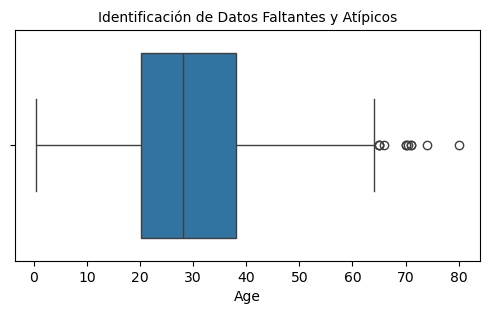

In [392]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [395]:
#Revisión de datos faltantes

print("Cantidad de Registros faltantes en clase: ",Datos['Pclass'].isnull().sum())
print("Cantidad de Registros faltantes en genero: ",Datos['Sex'].isnull().sum())
print("Cantidad de Registros faltantes en edad: ",Datos['Age'].isnull().sum())

# Revisamos las demas columnas
print(Datos.isnull().sum())


Cantidad de Registros faltantes en clase:  0
Cantidad de Registros faltantes en genero:  0
Cantidad de Registros faltantes en edad:  177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [397]:
# Reemplazamos los valores faltantes por el valor medio de la edad

#Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Age']=Datos['Age'].fillna(Datos['Age'].mean())

In [399]:
# Revisamos nuevamente los datos faltantes para descartar fallos en el proceso

print("Cantidad de Registros faltantes en clase: ",Datos['Pclass'].isnull().sum())
print("Cantidad de Registros faltantes en genero: ",Datos['Sex'].isnull().sum())
print("Cantidad de Registros faltantes en edad: ",Datos['Age'].isnull().sum())

# Revisamos las demas columnas
print(Datos.isnull().sum())


Cantidad de Registros faltantes en clase:  0
Cantidad de Registros faltantes en genero:  0
Cantidad de Registros faltantes en edad:  0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

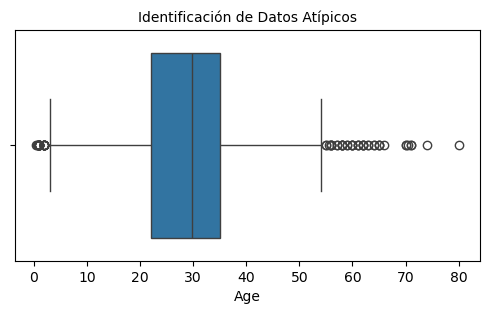

In [401]:
#Identificamos valores atipicos en la variable edad 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [403]:
# Realizamos un conteo de los datos atípicos en la variable edad

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El valor total de datos atípicos es {}".format(Total_Atipicos))

El valor total de datos atípicos es 0


In [405]:
# Filtranos los valores atipicos encontrados 

Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [407]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [409]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [411]:
# Eliminamos las columnas que no aportan valor al modelo
Datos= Datos.drop(['PassengerId','Name','Sex','Ticket','Fare','Cabin','Embarked'], axis=1)

In [413]:
# Ajustamos tipos de datos para el modelo
Datos = pd.DataFrame(Datos, 
                   columns = ['Survived', 'Pclass','Age', 'SibSp','Parch']).astype({
                   'Survived': np.int64, 'Pclass':np.int64, 'Age':np.float64, 'SibSp':np.int64, 'Parch':np.int64})
Datos.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [415]:
# Revisamos los datos para validar la eliminación de las columnas
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [417]:
#verificamos registros
Datos.head(10)

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.000000,1,0
1,1,1,38.000000,1,0
2,1,3,26.000000,0,0
3,1,1,35.000000,1,0
4,0,3,35.000000,0,0
5,0,3,29.699118,0,0
6,0,1,54.000000,0,0
7,0,3,2.000000,3,1
8,1,3,27.000000,0,2
9,1,2,14.000000,1,0


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* Sobreviviente: si la persona sobrevivio o no (0 = no sobrevivio - 1 = si sobrevivio)
* Predecir si un tripulante del titanic pudo sobrevivir al incidente

In [421]:
# Total de personas sobrevivientes

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [423]:
Datos[['Survived']].head(55)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [426]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna de sobrevivientes
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna sobrevivientes

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [428]:
print (X_train)

     Pclass        Age  SibSp  Parch
671       1  31.000000      1      0
417       2  18.000000      0      2
634       3   9.000000      3      2
323       2  22.000000      1      1
379       3  19.000000      0      0
..      ...        ...    ...    ...
131       3  20.000000      0      0
490       3  29.699118      1      0
528       3  39.000000      0      0
48        3  29.699118      2      0
80        3  22.000000      0      0

[668 rows x 4 columns]


In [430]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [433]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [435]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [437]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [440]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       137
           1       0.65      0.42      0.51        86

    accuracy                           0.69       223
   macro avg       0.68      0.64      0.64       223
weighted avg       0.68      0.69      0.67       223



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

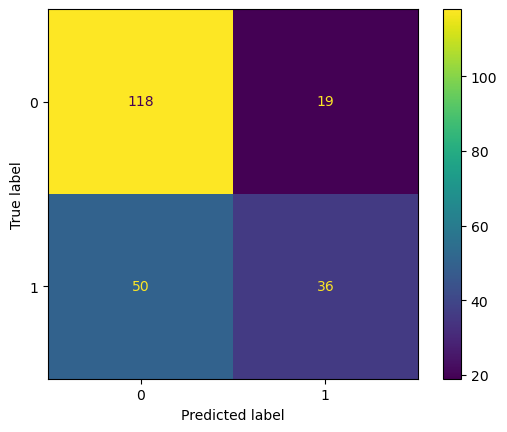

In [443]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

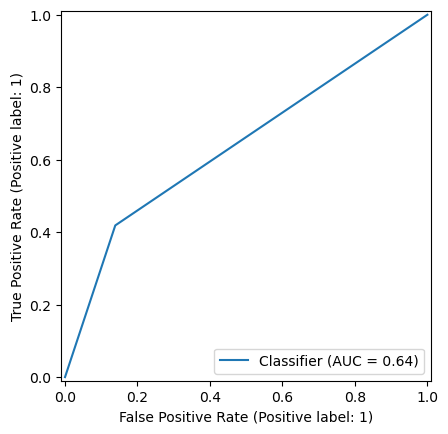

In [445]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- El modelo cuenta con una precision del 65% para la clase sobreviviente lo cual nos indica que el 65% de las personas predichas como sobrrevivientes eran en realidad sobrevivientes del incidente presetado en el titanic

- El Recall de este modelo es capas de identificar el 42% de los sobrevivientes 

- La puntuacion de este modelo segun F1 Score para la variable sobrevivientes es de 51% lo cual nos esta reflejando un mediano equilibrio entre la precicion y el recall ya que al ser tan bajo el porcentaje de recall refleja una mediana penalizacion en la puntuacion.


De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 118

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 19

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 50

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,64 lo que significa que el 64 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

